By :- Swaraj Sawarkar

**IMPORT LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
df.shape

(5110, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
from sklearn.impute import KNNImputer

In [9]:
imputer = KNNImputer(n_neighbors= 5)
df['bmi']=imputer.fit_transform(df[['bmi']])

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

**EXPLORATORY DATA ANALYSIS**

In [11]:
n_df = df[['id','age','hypertension','heart_disease',	'avg_glucose_level']]
n_df.head()

,id,age,hypertension,heart_disease,avg_glucose_level
0,9046,67.0,0,1,228.69
1,51676,61.0,0,0,202.21
2,31112,80.0,0,1,105.92
3,60182,49.0,0,0,171.23
4,1665,79.0,1,0,174.12


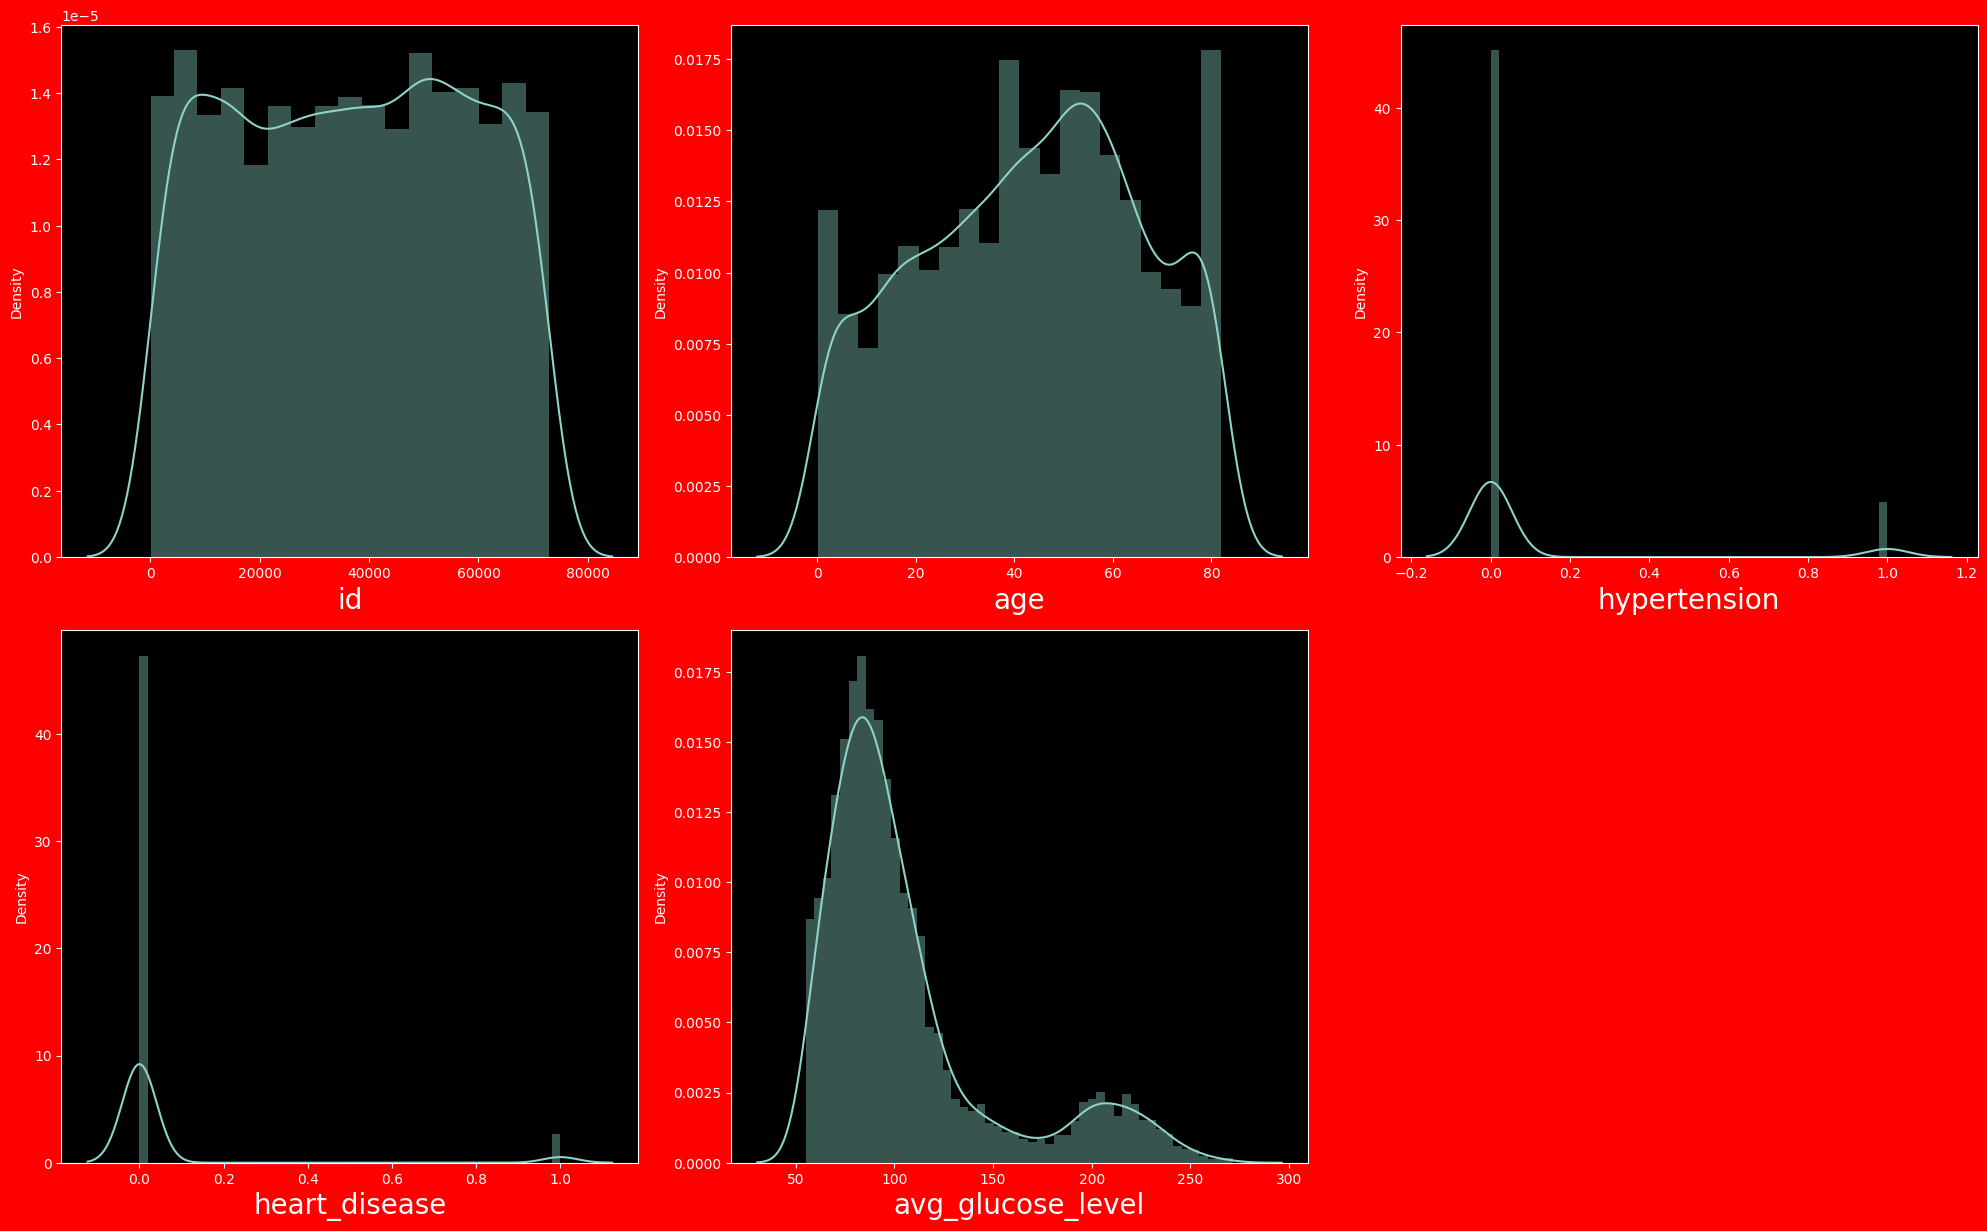

In [12]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.distplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 


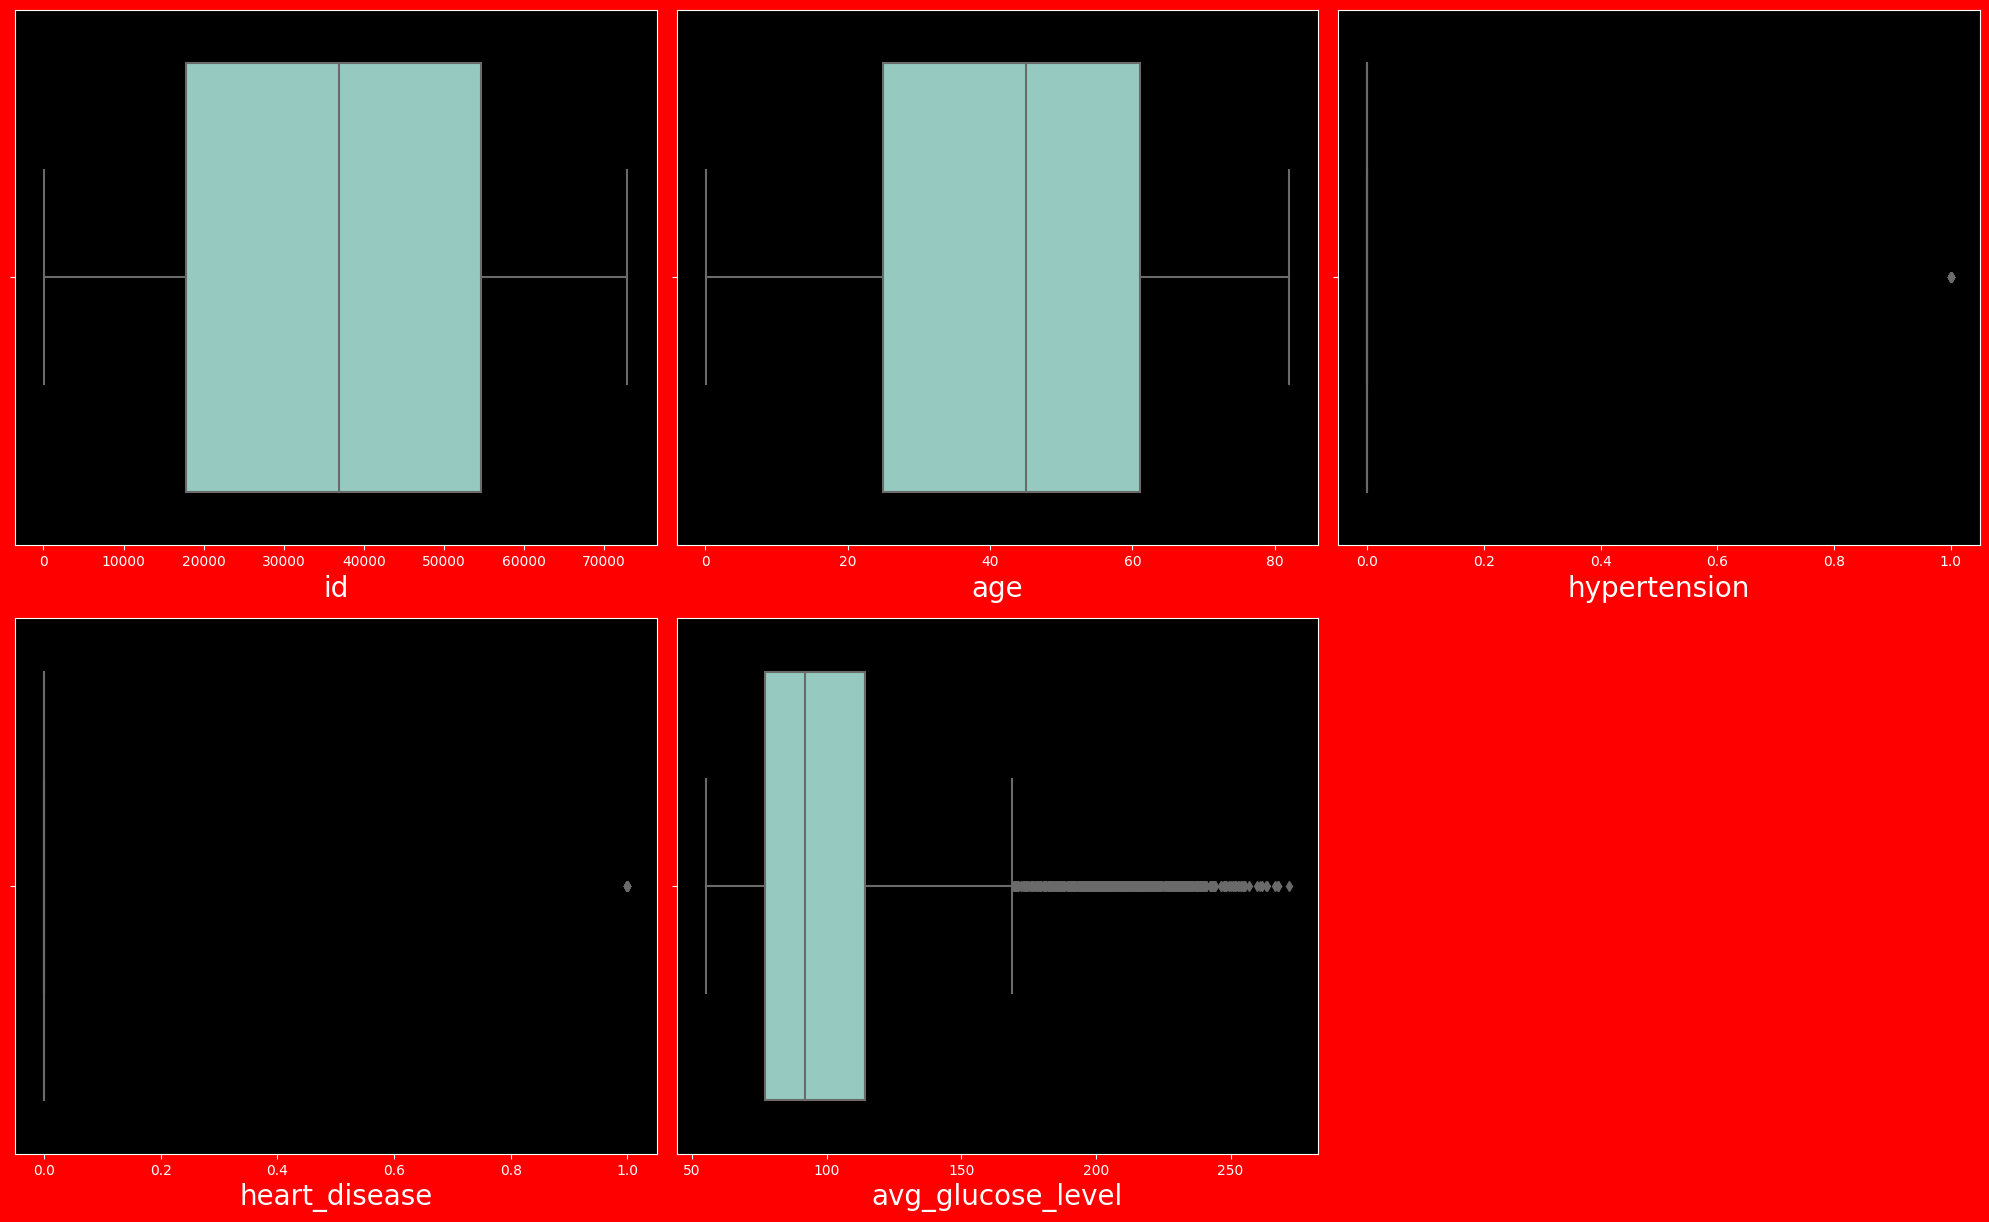

In [13]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.boxplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

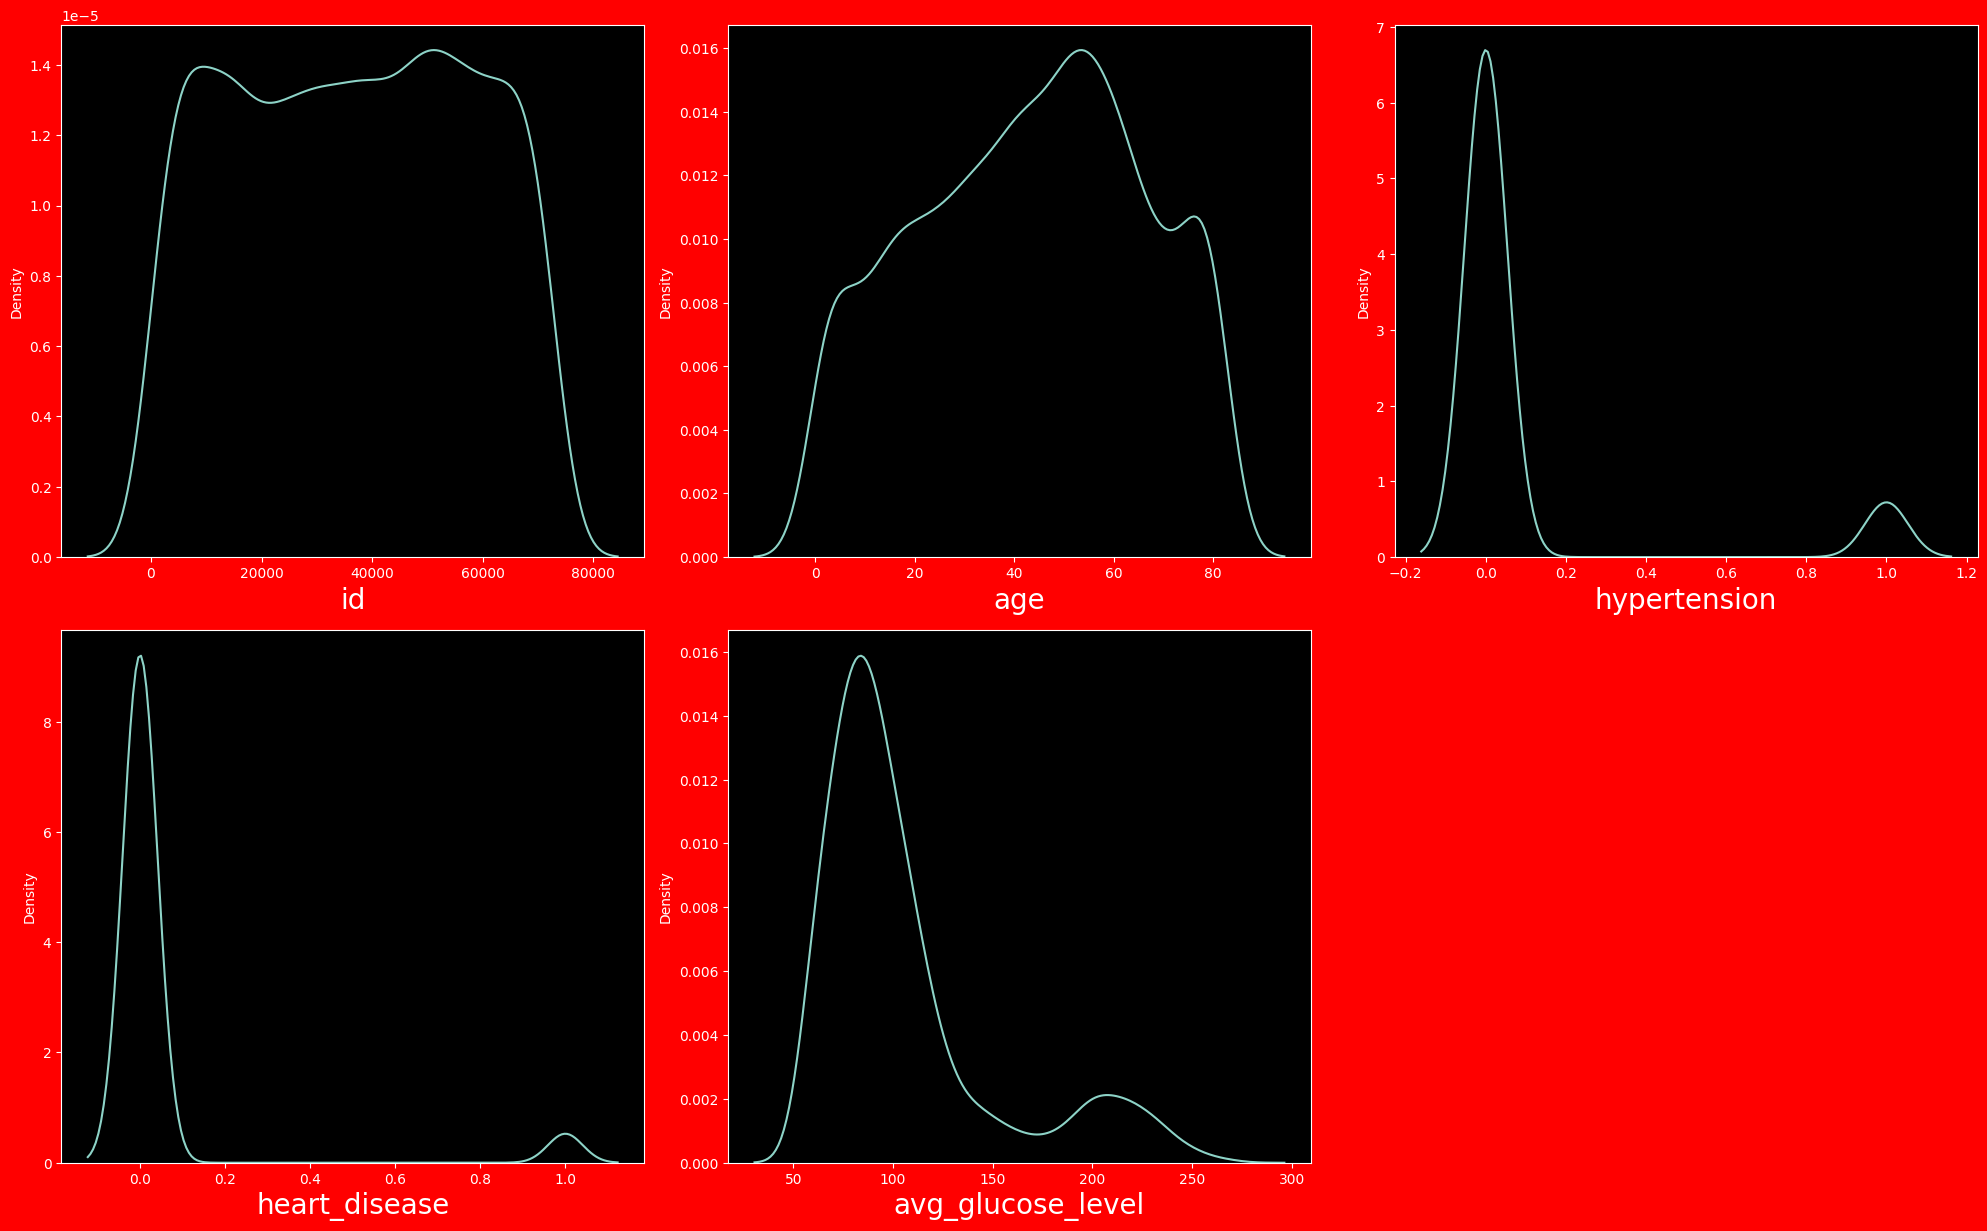

In [14]:
plt.figure(figsize=(20,30),facecolor ="r")
plotnumber=1

for column in n_df:
  if plotnumber<=15:
    ax = plt.subplot(5,3,plotnumber)
    sns.kdeplot(n_df[column])
    plt.xlabel(column,fontsize = 20)

  plotnumber+=1
plt.tight_layout()   
plt.show() 

In [15]:
# categorical columns

**CATEGORICAL DATA**

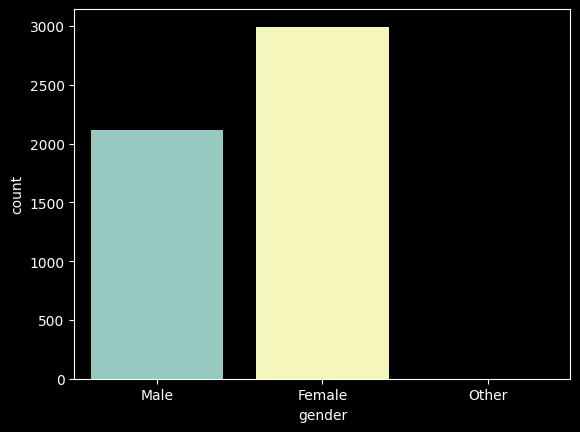

In [16]:
sns.countplot(df['gender'])
plt.show()

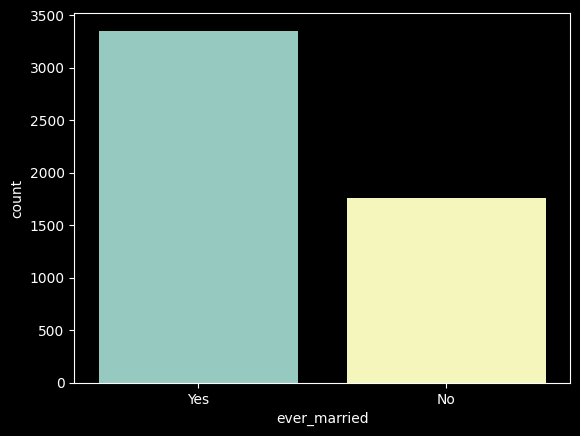

In [17]:
'''id	gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke'''
sns.countplot(df['ever_married'])
plt.show()

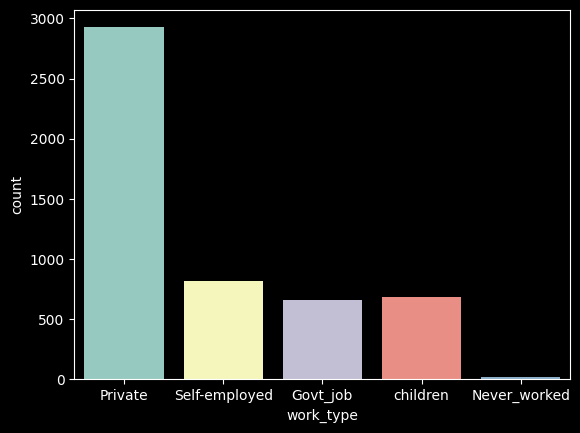

In [18]:
sns.countplot(df['work_type'])
plt.show()


In [19]:
## As the never worked field is very less in number we will drop theses rows.
df = df[df['work_type']!='Never_worked']

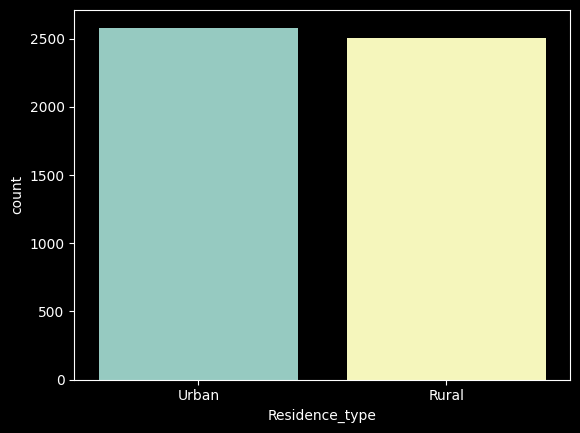

In [20]:
sns.countplot(df['Residence_type'])
plt.show()

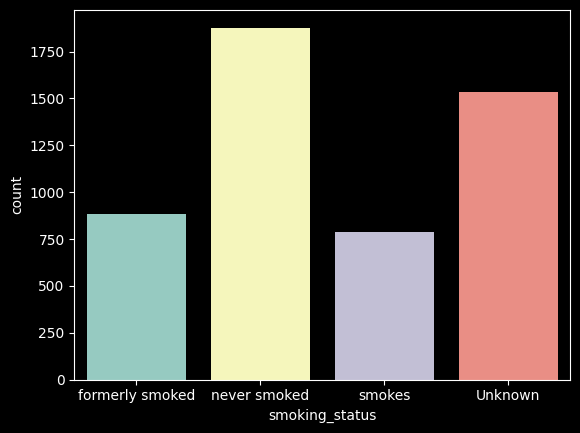

In [21]:
sns.countplot(df['smoking_status'])
plt.show()

**HANDLING CATEGORICAL DATA**

In [22]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [23]:
df['smoking_status'].value_counts()

never smoked       1878
Unknown            1536
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [24]:
df.smoking_status.nunique()

4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5088 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5088 non-null   int64  
 1   gender             5088 non-null   object 
 2   age                5088 non-null   float64
 3   hypertension       5088 non-null   int64  
 4   heart_disease      5088 non-null   int64  
 5   ever_married       5088 non-null   object 
 6   work_type          5088 non-null   object 
 7   Residence_type     5088 non-null   object 
 8   avg_glucose_level  5088 non-null   float64
 9   bmi                5088 non-null   float64
 10  smoking_status     5088 non-null   object 
 11  stroke             5088 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 645.8+ KB


In [26]:
df['stroke'].value_counts()

0    4839
1     249
Name: stroke, dtype: int64

Balancing Unbalanced Dataset

In [27]:
class_1 = df[df["stroke"]==1]
class_0 = df[df["stroke"]==0]

In [28]:
class_1_data = class_1
class_0_data = class_0.sample(n=class_1.shape[0])

In [29]:
df = pd.concat([class_1_data,class_0_data])

In [30]:
df.gender.value_counts()

Female    294
Male      204
Name: gender, dtype: int64

In [31]:
gender = pd.get_dummies(df[['gender']],drop_first=True)
gender.head()

,gender_Male
0,1
1,0
2,1
3,0
4,0


In [32]:
ever_married = pd.get_dummies(df[['ever_married']],drop_first=True)
ever_married.head()

,ever_married_Yes
0,1
1,1
2,1
3,1
4,1


In [33]:
work_type = pd.get_dummies(df[['work_type']],drop_first=True)
work_type.head()

,work_type_Private,work_type_Self-employed,work_type_children
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,0,1,0


In [34]:
Residence_type = pd.get_dummies(df[['Residence_type']],drop_first=True)
Residence_type.head()

,Residence_type_Urban
0,1
1,0
2,0
3,1
4,0


In [35]:
smoking_status = pd.get_dummies(df[['smoking_status']],drop_first=True)
smoking_status.head()

,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,1,0


In [36]:
data=pd.concat([df,gender,ever_married,work_type,Residence_type,smoking_status],axis=1)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,1,1,1,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,1,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,1,1,1,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,1,0,1,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,1,0,1,0,1,0,0,0,1,0


In [37]:
data = data.drop(columns=['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,1,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,1,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,1,0,1,0,0,0,1,0


In [38]:
data = data.drop(columns=['id'])
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,1,1,1,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,1,1,1,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,1,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,1,0,1,0,0,0,1,0


In [39]:
correlation = data.corr()
correlation

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,ever_married_Yes,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.292581,0.265034,0.277942,0.267526,0.597024,0.002255,0.609941,0.067157,0.312768,-0.643868,0.062989,0.220024,0.175853,-0.004436
hypertension,0.292581,1.000000,0.069065,0.172504,0.156726,0.270718,0.004510,0.116169,-0.070408,0.208528,-0.141635,-0.028588,0.072079,0.141342,-0.005289
heart_disease,0.265034,0.069065,1.000000,0.203468,0.049494,0.172861,0.089374,0.097501,0.017015,0.022211,-0.123601,0.004918,-0.008830,-0.016937,0.153507
avg_glucose_level,0.277942,0.172504,0.203468,1.000000,0.295487,0.199494,0.084726,0.232298,0.020828,0.023102,-0.140294,0.013094,0.072406,0.059054,0.013467
bmi,0.267526,0.156726,0.049494,0.295487,1.000000,0.165334,-0.029294,0.321997,0.173579,0.037608,-0.400415,0.028668,0.104949,0.092657,0.067535
stroke,0.597024,0.270718,0.172861,0.199494,0.165334,1.000000,0.049000,0.302653,0.040663,0.173073,-0.291274,0.020122,0.134665,0.004185,0.050529
gender_Male,0.002255,0.004510,0.089374,0.084726,-0.029294,0.049000,1.000000,0.013119,0.025005,-0.044772,0.044516,-0.012719,0.098978,-0.172964,0.083080
ever_married_Yes,0.609941,0.116169,0.097501,0.232298,0.321997,0.302653,0.013119,1.000000,0.123824,0.185444,-0.557023,-0.033111,0.185824,0.128195,0.084934
work_type_Private,0.067157,-0.070408,0.017015,0.020828,0.173579,0.040663,0.025005,0.123824,1.000000,-0.572281,-0.373591,0.006087,-0.017249,0.021032,0.120813
work_type_Self-employed,0.312768,0.208528,0.022211,0.023102,0.037608,0.173073,-0.044772,0.185444,-0.572281,1.000000,-0.155895,-0.011062,0.090339,0.079501,-0.020749


**HEATMAP**

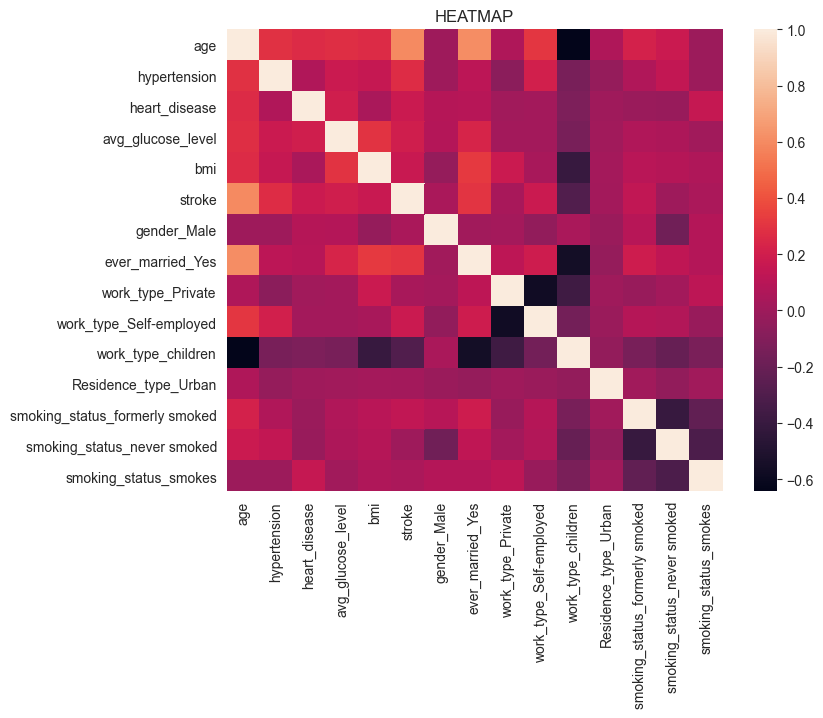

In [40]:
sns.set({'figure.figsize':(8,6)})
sns.heatmap(data=correlation)
plt.title('HEATMAP')
plt.show()

**SPLIT DATASET INTO TRAIN AND TEST**

In [41]:
X = data.drop(columns=['stroke'],axis =1)
print(X)

       age  hypertension  heart_disease  avg_glucose_level        bmi  \
0     67.0             0              1             228.69  36.600000   
1     61.0             0              0             202.21  28.893237   
2     80.0             0              1             105.92  32.500000   
3     49.0             0              0             171.23  34.400000   
4     79.0             1              0             174.12  24.000000   
...    ...           ...            ...                ...        ...   
3767  37.0             0              0              72.09  24.100000   
3840  14.0             0              0              69.74  24.200000   
2716  15.0             0              0              77.55  24.800000   
391   26.0             0              0             120.31  22.300000   
3790  53.0             0              0              60.77  28.700000   

      gender_Male  ever_married_Yes  work_type_Private  \
0               1                 1                  1   
1      

In [42]:
y = data[['stroke']]
print(y)

      stroke
0          1
1          1
2          1
3          1
4          1
...      ...
3767       0
3840       0
2716       0
391        0
3790       0

[498 rows x 1 columns]


In [43]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X = Sc.fit_transform(X)

In [44]:
X

array([[ 0.56573911, -0.44397678,  2.58099563, ...,  1.85645592,
        -0.74908513, -0.42107596],
       [ 0.30796225, -0.44397678, -0.38744738, ..., -0.53866078,
         1.33496176, -0.42107596],
       [ 1.12425563, -0.44397678,  2.58099563, ..., -0.53866078,
         1.33496176, -0.42107596],
       ...,
       [-1.66832699, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513, -0.42107596],
       [-1.19573609, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513,  2.37486842],
       [-0.03574023, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513,  2.37486842]])

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=1)

In [46]:
X_train

array([[-1.96906666, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513, -0.42107596],
       [ 0.73759035, -0.44397678, -0.38744738, ..., -0.53866078,
         1.33496176, -0.42107596],
       [ 0.13611101, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513, -0.42107596],
       ...,
       [-1.75425261, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513, -0.42107596],
       [ 0.60870192, -0.44397678, -0.38744738, ..., -0.53866078,
        -0.74908513, -0.42107596],
       [ 0.78055316,  2.25237003, -0.38744738, ...,  1.85645592,
        -0.74908513, -0.42107596]])

**MODEL TRAINING**

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


In [48]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DescisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("SupportVector",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))


In [49]:
for name,model in models:
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)
    print(name,"train score =",train_score)
    print(name,"test score =",test_score)

LogisticRegression train score = 0.7966903073286052
LogisticRegression test score = 0.8266666666666667
DescisionTree train score = 1.0
DescisionTree test score = 0.6666666666666666
RandomForest train score = 1.0
RandomForest test score = 0.76
SupportVector train score = 0.8156028368794326
SupportVector test score = 0.76
KNeighbors train score = 0.7943262411347518
KNeighbors test score = 0.6666666666666666


In [50]:
## Choosig Logistic Regression as best model.

In [51]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
probablities = model.predict_proba(X_test)
model.score(X_test,y_test)

0.8266666666666667

**Creating confusion matrix**

In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,prediction))

[[30  9]
 [ 4 32]]


**Creating classification report**

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        39
           1       0.78      0.89      0.83        36

    accuracy                           0.83        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.83      0.83      0.83        75



In [54]:
X_train.shape

(423, 14)

### Saving model

In [55]:
import pickle

In [63]:
pickle_out = open("stroke.pkl","wb")
pickle.dump(model,pickle_out)

In [64]:
loaded_model = pickle.load(open("stroke.pkl","rb"))
result = loaded_model.score(X_test,y_test)
print(result)

0.8266666666666667
